## Codebase Represenation



In [1]:
# defining instance
import numpy as np

In [11]:
import os

### Practice

In [13]:
## getting current working directory as test
os.getcwd()

'/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/LargeNKP'

In [27]:
from os import listdir
mypath = '/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/'
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [36]:
import os

## practice get list of files from starting path
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}--{}'.format(subindent, f))

In [47]:
# defining starting directory
str_dir = '/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal'

#### Main Code

In [78]:
## getting list of elements for directory

verbose = False

num_elements=0
startpath = str_dir
elements_list = list()
for root, dirs, files in os.walk(startpath):
    if verbose: print('Root:',root)
    if root not in elements_list:
        elements_list.append(root)
        num_elements+=1
    if verbose: 
        print('Level:',root.replace(startpath, '').count(os.sep))
        print('Directories:',dirs)
        print('Files')
    for f in files:
        if verbose: print('   ---',f)
        full_path = join(root, f)
        if full_path not in elements_list:
            elements_list.append(full_path)
            num_elements+=1
    if verbose: print()
    
num_elements

10921

In [53]:
## determining whether element is a directory or not
## and storing

directory_question = dict()
for elem in elements_list:
    if os.path.isdir(elem):
        directory_question[elem] = True
    else: 
        directory_question[elem] = False

In [79]:
## building tree structure for files

# empty directory structure matrix
dir_structure = np.zeros((num_elements, num_elements))

# going through indices of matrix
for idx1 in range(num_elements):
    # call corresponding element
    elem = elements_list[idx1]
    # if element is a directory continue
    if directory_question[elem]:
        # find sub directories in directory
        sub_dirs = os.listdir(elem)
        # loop through sub directories/files
        for sub_element in sub_dirs:
            # get full path for sub directory/file
            full_path = join(elem, sub_element)
            # get corresponding index of sub directory/file
            idx2 = elements_list.index(full_path)
            # file in matrix indicating that an 
            # arrow points from idx1 to idx2
            dir_structure[idx1, idx2]=1

In [93]:
## number of files
files_list = [file for file in elements_list if not directory_question[file] ]
num_files = len(files_list)

In [106]:
from tqdm.notebook import tqdm

In [111]:
# symmetric directory structure for computing 
symm_dir_structure = dir_structure + dir_structure.T

In [113]:
## computing adjacency matrix for all files; Needs a GPU to compute; Projected time is 166 hours otherwise
large_dist = int(1e9)
shortest_path_adj = np.zeros((num_files, num_files))

# graph for directory
dir_G = nx.from_numpy_matrix(symm_dir_structure, create_using=nx.DiGraph())
for k in tqdm(range(num_files)):
    for j in range(k+1, num_files):
        shortest_path_adj[k, j] = nx.dijkstra_path_length(dir_G, k, j)

In [108]:
np.linalg.matrix_power(dir_structure,3)

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Djikstra Path Computation

In [ ]:
nx.dijkstra_path_length

In [103]:
import networkx as nx
import numpy as np
A = np.array([[0, 1, 1, 0],
              [0, 0, 0, 1],
              [0, 1, 0, 1],
              [1, 0, 0, 0]])
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
print(nx.dijkstra_path_length(G, 0, 3))

2


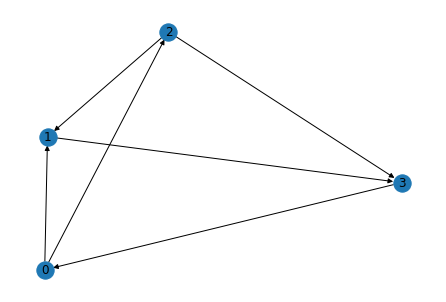

In [100]:
nx.draw(G, with_labels = True)